Miner Evaluation

To run a miner, read the miner.md located in assets/miner.md 
This notebook will demonstrate how to evaluate the results from testnet and compare it to expected results on mainnet.
Please ensure that your miner has been running for at least 2 hours before evaluating.


In [27]:
!pip install wandb matplotlib

In [28]:
#INPUT DATA HERE
YOUR_TESTNET_UID = 10
TESTNET_RUN_ID = None
MAINNET_RUN_ID = None

In [29]:
# Locate your run on testnet
import wandb
import matplotlib.pyplot as plt
import pandas as pd

api = wandb.Api(timeout=120)
project_name = "macrocosmos/prompting-validators"
if TESTNET_RUN_ID is None:
    tag = "Netuid: 61"
    # Fetch all runs from the project
    runs = api.runs(project_name)

    # Filter runs that contain the specific tag
    filtered_runs = [run for run in runs if tag in run.tags]

    # Sort runs by created time, with the latest first
    if filtered_runs:
        latest_run_testnet = sorted(filtered_runs, key=lambda run: run.created_at, reverse=True)[0]
    else:
        print("No runs found with the specified tag. Try to manually locate the run using the Weights and Biases web app.")
        print("If there is no active run, please message us in discord and we will spin one up for you.")
else:
    latest_run_testnet = api.run(f"{project_name}/{TESTNET_RUN_ID}")




In [30]:
if MAINNET_RUN_ID is None:
    # Pull the most recent run from mainnet by taostats
    tag = "Netuid: 1"
    username = "taostats"

    # Fetch all runs from the project
    runs = api.runs(project_name)

    # Filter runs that contain the specific tag and are from the specified user
    filtered_runs = [run for run in runs if tag in run.tags and run.state == "running"]

    # Sort runs by created time, with the latest first
    if filtered_runs:
        latest_run_mainnet = sorted(filtered_runs, key=lambda run: run.created_at, reverse=True)[0]
    else:
        print("No runs found with the specified tag. Try to manually locate the most recent taostats run on mainnet using the Weights and Biases web app.")
else:
    latest_run_mainnet = api.run(f"{project_name}/{MAINNET_RUN_ID}")


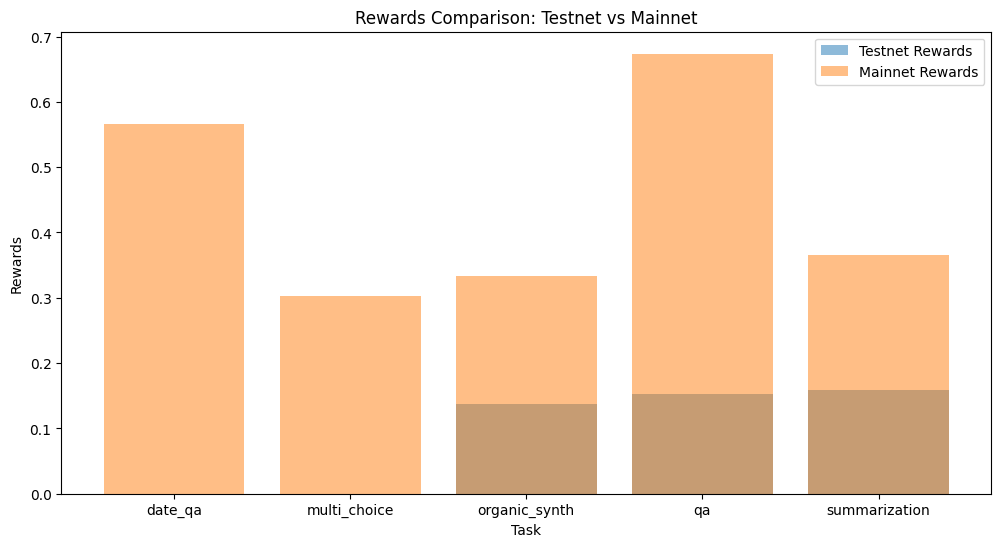

In [34]:
testnet_df = pd.DataFrame(latest_run_testnet.scan_history()).explode(['uids', 'rewards'])
mainnet_df = pd.DataFrame(latest_run_mainnet.history()).explode(['uids', 'rewards'])

testnet_df = testnet_df[testnet_df['uids'] == YOUR_TESTNET_UID].tail(100)

grouped_testnet_df = testnet_df.groupby('task').rewards.mean()
grouped_mainnet_df = mainnet_df.groupby('task').rewards.mean()

# Plot the rewards grouped by task for both testnet and mainnet
plt.figure(figsize=(12, 6))
plt.bar(grouped_testnet_df.index, grouped_testnet_df, label='Testnet Rewards', alpha=0.3)
plt.bar(grouped_mainnet_df.index, grouped_mainnet_df, label='Mainnet Rewards', alpha=0.3)
plt.xlabel('Task')
plt.ylabel('Rewards')
plt.title('Rewards Comparison: Testnet vs Mainnet')
plt.legend()